In [1]:
import pandas as pd
from sklearn.cluster import DBSCAN, OPTICS
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 200)

In [2]:
comments = pd.read_csv('comments_lemm_stemm.csv').drop(columns=['likes']).reset_index()
corpus = comments.text_stem.values
comments = comments.loc[:, ['text']]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
X

<4866x3376 sparse matrix of type '<class 'numpy.float64'>'
	with 57584 stored elements in Compressed Sparse Row format>

In [3]:
%%time
def cluster(X, method, params, label, comments):
    clusters = method(**params).fit(X)
    comments[label] = clusters.labels_
    print(Counter(clusters.labels_))
    return comments

for i in range(5):
    eps = 0.999 + i*0.0005
    print('eps = ', eps)
    cluster(X, DBSCAN, {'eps':eps, 'min_samples': 5}, f'DBSCAN{i}', comments)

eps =  0.999
Counter({-1: 4555, 0: 187, 4: 15, 14: 12, 5: 10, 3: 9, 6: 9, 12: 9, 9: 8, 7: 7, 10: 7, 2: 6, 1: 6, 11: 6, 8: 5, 13: 5, 15: 5, 16: 5})
eps =  0.9994999999999999
Counter({-1: 4554, 0: 188, 4: 15, 14: 12, 5: 10, 3: 9, 6: 9, 12: 9, 9: 8, 7: 7, 10: 7, 2: 6, 1: 6, 11: 6, 8: 5, 13: 5, 15: 5, 16: 5})
eps =  1.0
Counter({0: 3778, -1: 1088})
eps =  1.0005
Counter({0: 4866})
eps =  1.001
Counter({0: 4866})
CPU times: total: 1.77 s
Wall time: 1.77 s


### DBSCAN is not very good, but i could find an interesting cluster about пельмени...

In [4]:
comments.loc[comments.DBSCAN1 == 4, ['text']]

,text
420,Если раскулачить этих жуликов то и протестов бы не было
634,Помимо пельменей ещё по кружке пива надо!!!
660,Пельмени пельмени пельмени пельмени пельмени
669,"Любовь к пельменям видна и из количества упоминаний слова ""пельмени"" в одной фразе"
672,У нас были в школе пельмени
697,Пельмени пельмени ммммм..... Какие пельмени как же я люблю пельмени меня хлебом не корми дай только пельменей поесть.... Пельмени!!!!!!!!!
705,Если бы это были пельмени!
708,Когда с бадуна захотел пельменей.
712,Пельменями пахнет мой фирменный галстук Пельмени на ужин Пельмени на завтрак
713,Пельмени без мазика - деньги на ветер


### Science and tehnology

In [5]:
comments.loc[comments.DBSCAN1 == 14, ['text']]

,text
4433,перед десятилетием науки и технологий было 30 лет уничтожение оных
4434,Указом президента 2022-2031 годы в РФ объявлены десятилетием науки и технологий. Вся мощь российской науки теперь брошена на благо людей. К 2030 году мы должны будем научиться делать гвозди и туал...
4438,"""Указом президента 2022-2031 годы в РФ объявлены десятилетием науки и технологий"" - Поздновато опомнились"
4439,"На Сколково мало наворовали, нужно ещё 10 лет доить науку Сначала урежем бюджет на науку, а потом объявил десятилетие технологий((( В образовании и медицине проблемы решены, можно и за науку взять..."
4442,2022-2031 Отсутствием науки и технологий*
4447,"Ох уж это десятилетие науки и технологий в России🤡🤡🤡Типа к 100 летию, индустриализацию СССР решили косплеить?🤡🤡🤡"
4449,"""2022-2031 - десятилетие науки и технологий""... Орнул на всю квартиру"
4450,"» Указом президента 2022-2031 годы в РФ объявлены десятилетием науки и технологий Это дед хотел показать, что еще сохраняет чувство юмора?"
4453,— Указом президента 2022-2031 годы в РФ объявлены десятилетием науки и технологий- это хороший указ!главное что работал
4455,Астрологи объявили десятилетие науки и технологий


### 3 - один... восемь, 5 - 'Че' cluster, 6 - Ukrain, 12 - МИД, дума, депутаты

In [6]:
comments.loc[(comments.DBSCAN1 == 3) + (comments.DBSCAN1 == 5) + (comments.DBSCAN1 == 6) + (comments.DBSCAN1 == 12), ['text', 'DBSCAN1']].sort_values(['DBSCAN1'])

,text,DBSCAN1
225,"Пикчер, извенисб три шестб восемь",3
520,Ветеранов чтить мы не бросим один четыре восемь восемь,3
546,"Мы День победы отмечать не бросим, один четыре восемь восемь)",3
563,Классека же три четыре пять четырнадцать восемь восемь,3
564,А каким образом 1488 (тысяча четыреста восемьдесят восемь) Связано с 14/88 (четырнадцать восемьдесят восемь)?,3
2669,"Р-репресия два, четыре, шесть восемь",3
2457,видосер гений четыре восеьм шесть,3
2137,Один четыре восемь восемь шесть,3
1734,"Один два три четырнадцать сорок восемь. Гадайте, о чём это.",3
3364,А че вообще там за хня творится?,5


In [10]:
from sklearn.cluster import KMeans
for i in range(3, 11):
    cluster(X, KMeans, {'n_clusters': i, 'random_state': 42}, f'Kmeans{i}', comments)

Counter({1: 3344, 0: 1408, 2: 114})
Counter({0: 2446, 3: 1245, 2: 1061, 1: 114})
Counter({0: 2047, 3: 1133, 2: 982, 4: 590, 1: 114})
Counter({0: 1832, 3: 1068, 2: 722, 4: 572, 5: 558, 1: 114})
Counter({0: 1665, 3: 964, 6: 647, 4: 567, 5: 533, 2: 376, 1: 114})
Counter({0: 1539, 7: 972, 6: 796, 5: 542, 1: 497, 2: 211, 4: 195, 3: 114})
Counter({2: 1531, 8: 869, 5: 676, 6: 503, 0: 405, 3: 323, 7: 271, 4: 174, 1: 114})
Counter({2: 1262, 8: 854, 9: 621, 6: 468, 5: 370, 0: 369, 3: 362, 7: 279, 4: 167, 1: 114})


In [27]:
def cluster_difference(comments_labeled, clusters_names, clusters_numbers):
    cluster0 = comments_labeled[comments_labeled[clusters_names[0]] == clusters_numbers[0]].index
    cluster1 = comments_labeled[comments_labeled[clusters_names[1]] == clusters_numbers[1]].index
    intersection = cluster0.intersection(cluster1)
    diff0 = cluster0.difference(cluster1)
    diff1 = cluster1.difference(cluster0)
    return intersection, diff0, diff1

def cluster_similarity(func):
    def show_info(comments_labeled, clusters_names, clusters_numbers):
        intersection, diff0, diff1 = func(comments_labeled, clusters_names, clusters_numbers)
        print('intersection: {0:d}; {3:s} - {4:s} = {1:d}; {4:s} - {3:s} = {2:d}'.format(len(intersection), len(diff0), len(diff1), *clusters_names))
    return show_info 

### all clusters with 114 comments contains numbers - very stable cluster

In [32]:
cluster_similarity(cluster_difference)(comments, ['Kmeans3', 'Kmeans4'], [2, 1])
cluster_similarity(cluster_difference)(comments, ['Kmeans4', 'Kmeans5'], [1, 1])
cluster_similarity(cluster_difference)(comments, ['Kmeans5', 'Kmeans6'], [1, 1])
cluster_similarity(cluster_difference)(comments, ['Kmeans5', 'Kmeans6'], [1, 1])
cluster_similarity(cluster_difference)(comments, ['Kmeans6', 'Kmeans7'], [1, 1])
cluster_similarity(cluster_difference)(comments, ['Kmeans7', 'Kmeans8'], [1, 3])
cluster_similarity(cluster_difference)(comments, ['Kmeans8', 'Kmeans9'], [3, 1])

intersection: 114; Kmeans3 - Kmeans4 = 0; Kmeans4 - Kmeans3 = 0
intersection: 114; Kmeans4 - Kmeans5 = 0; Kmeans5 - Kmeans4 = 0
intersection: 114; Kmeans5 - Kmeans6 = 0; Kmeans6 - Kmeans5 = 0
intersection: 114; Kmeans5 - Kmeans6 = 0; Kmeans6 - Kmeans5 = 0
intersection: 114; Kmeans6 - Kmeans7 = 0; Kmeans7 - Kmeans6 = 0
intersection: 114; Kmeans7 - Kmeans8 = 0; Kmeans8 - Kmeans7 = 0
intersection: 114; Kmeans8 - Kmeans9 = 0; Kmeans9 - Kmeans8 = 0


In [41]:
comments.loc[comments.Kmeans10 == 1, ['text']][:5]

,text
249,Годный #радиолентач три четыре пять
267,Горшок жив три четыре пять
270,абсолютное гoвнo три четыре пять
276,Три ноль семь два один
283,Раз два три четыре пять...


### Kazakhstan topic

In [44]:
comments.loc[comments.Kmeans10 == 0, ['text']][:20]

,text
10,Зелю предупредили. Будет как в Казахстане
49,Зелю предупредили. Будет как в Казахстане
75,Каспи банк то разорился или как?
79,Скорость с какой свергали власть в новейшей истории потрясает
85,Ебобошкам менять теперь методички про захват Казахстана Путиным🤣😂 Как же им тяжело в последнее время то...
89,"Позвал иностранные войска, чтобы победить армию иностранных террористов. Как будто не Казахстан а проходной двор какой-то 🤦‍♂"
91,Мне одному кажется что он будто выглядит не естественно?🤔 Типа как будто дипфэйк с использованием нейросетей
97,"Они как тараканы, плодятся сами и мешают жить другим, потом отравляют жизнь всем, ну и конечно же сами не уходят🇮🇱😄👍"
98,Казах не смог. А как похорошел казахстан при токаеве
99,"Как я и ожидал - быдлоалкашню упаковали, коричневый майдаун провалился."


In [7]:
%%time
pca = PCA(2)
X0 = pca.fit_transform(X.todense())
X0.shape

CPU times: total: 1.03 s
Wall time: 331 ms


(4866, 2)

### Visually I can see 3 clusters

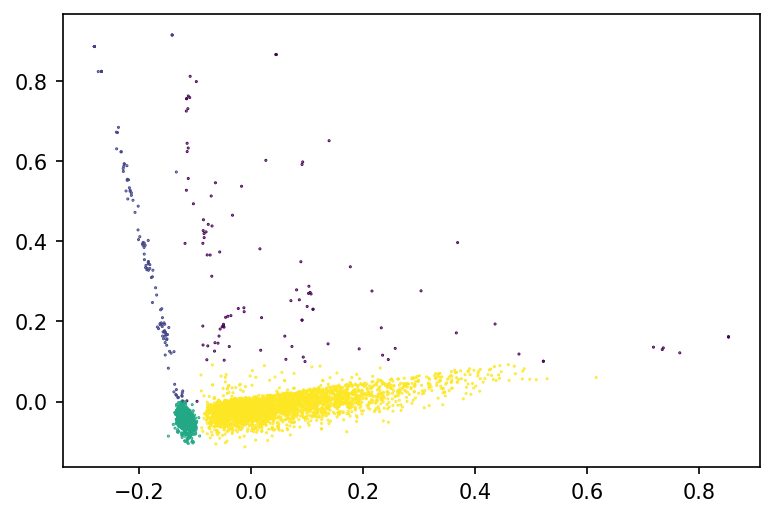

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(dpi=150)
mask0 = (X0[:, 0] < -0.12) * (X0[:, 1] > 0.)
mask1 = (X0[:, 0] < -0.09) * (X0[:, 1] < 0.)
mask2 = (X0[:, 0] > -0.09) * (X0[:, 1] < 0.1)
colors = mask0 * 10
colors += mask1 * 30
colors += mask2 * 50

ax.scatter(X0[:, 0], X0[:, 1], s=0.2, c=colors)

### one two ... cluster

In [9]:
comments[mask0]

,text,DBSCAN0,DBSCAN1,DBSCAN2,DBSCAN3,DBSCAN4
228,Пикчер как всегда - молодец! Пять!,-1,-1,0,0,0
267,Горшок жив три четыре пять,0,0,0,0,0
270,абсолютное гoвнo три четыре пять,0,0,0,0,0
276,Три ноль семь два один,0,0,0,0,0
283,Раз два три четыре пять...,0,0,0,0,0
...,...,...,...,...,...,...
4608,Где статистика по ковиду пять?,-1,-1,0,0,0
4712,А кто на пикче? Четыре пять,-1,-1,-1,0,0
4762,Целью был Соловьёв четыре пять.,-1,-1,0,0,0
4773,Класека (два три четыре пять),0,0,0,0,0
